# Linear Regression - Iris dataset

This notebook uses linear regression to predict a flower's sepal length using the iris dataset.

## Notebook setup

This notebook was developed using the following versions:

Python = 3.12.6

matplotlib = 3.9.2  
pandas = 2.2.3  
scikit-learn = 1.5.1  
seaborn = 0.13.2  

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Prep data

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

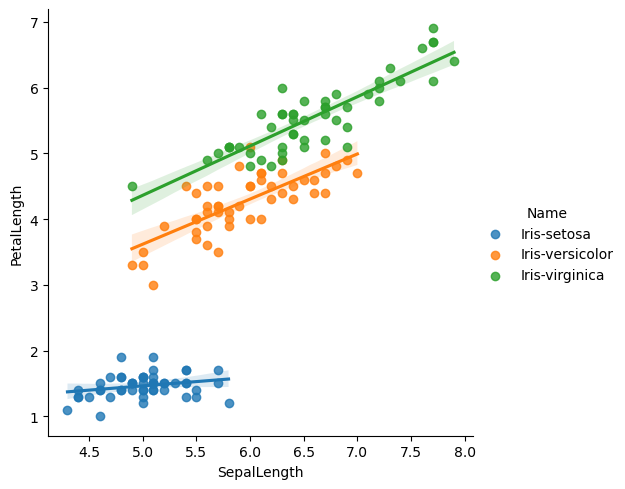

In [4]:
sns.lmplot(iris, x = 'SepalLength', y = 'PetalLength', hue = 'Name')

There does appear to be a linear relationship between sepal length and petal length for all three types of plant. It is however stronger for setosa and versicolor. Broadly, the data shows homoscedasticity although with a tendency to cluster more in the middle of the data points.

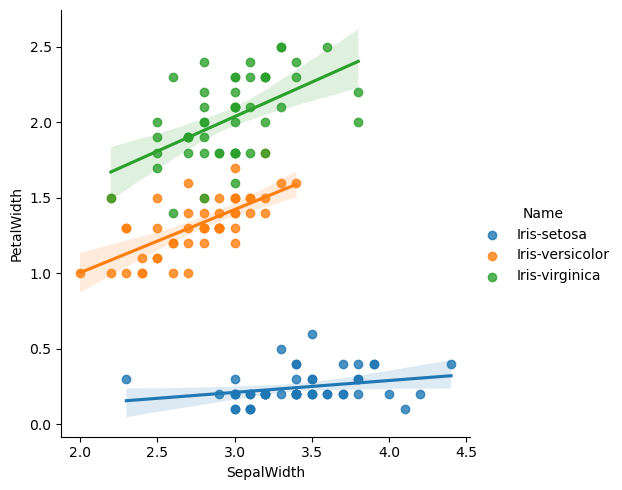

In [5]:
sns.lmplot(iris, x = 'SepalWidth', y = 'PetalWidth', hue = 'Name')

There appears to be weak linear relationship between sepal width and petal width, most clearly for setosa.

## Create model

In [6]:
# Split data into features (X) and target (y)
# Features
iris_independent_data = iris[['SepalWidth', 'PetalLength', 'PetalWidth']]
X = iris_independent_data

# Target
iris_dependent_data = iris[['SepalLength']]
y = iris_dependent_data

# Split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Instantiate and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

## Model evaluation

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.2340225988947485
Mean Squared Error (MSE): 0.10222382910995537
Root Mean Squared Error (RMSE): 0.31972461448871176
R-squared (R²): 0.8519067571325739


/Users/jackwalker/anaconda3/envs/log-reg/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


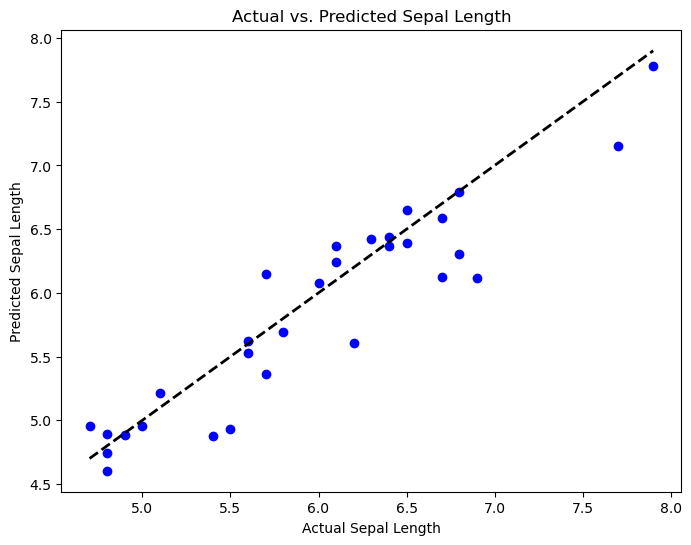

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sepal Length')
plt.ylabel('Predicted Sepal Length')
plt.title('Actual vs. Predicted Sepal Length')
plt.show()

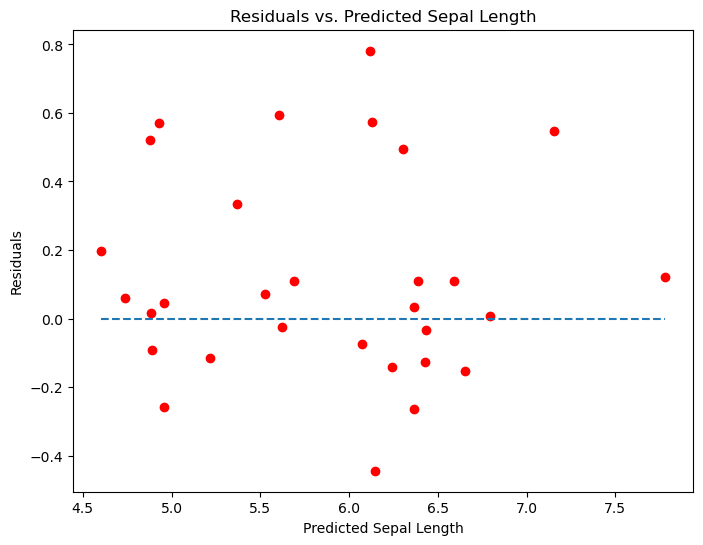

In [20]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed')
plt.xlabel('Predicted Sepal Length')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sepal Length')
plt.show()

In [21]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {cv_scores}')
print(f'Mean Cross-validated R²: {cv_scores.mean()}')

Cross-validated R² scores: [0.55888307 0.8304917  0.30989863 0.81804549 0.55864429]
Mean Cross-validated R²: 0.6151926359920251
